# Uso de la Clase MeanRevBacktester
Ahora usaremos la clase Mean Reversion Backtester la cual permite realizar backtest con muchas estrategias y muchos instrumentos usando unas pocas líneas de código. El módulo MeanRevBacktester debe residir en la carpeta de trabajo

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8-whitegrid")

In [9]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [11]:
ptc = 0.00007

In [23]:
import MeanRevBacktester as MeanRev

In [24]:
tester = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2019-12-31", ptc)

In [14]:
tester

MeanRevBacktester(symbol = EURUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [15]:
tester.test_strategy()

(np.float64(1.069792), np.float64(0.132076))

Habiendo creado una instancia (tester) de la clase MeanBacktester, realizamos el backtest de nuestros datos llamando al método test_strategy. El resultado corresponde al rendimiento absoluto de nuestra estrategia y la mejora del rendimiento, comparada con B/H.  
También podemos ver como ha sido modificado el dataframe como resultado de los cálculos:

In [16]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,0.0,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,0.0,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,0.0,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,-0.000070,1.0,1.014865,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,0.0,1.016781,0.998045
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.0,0.937352,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.0,0.937369,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.0,0.937498,1.070040


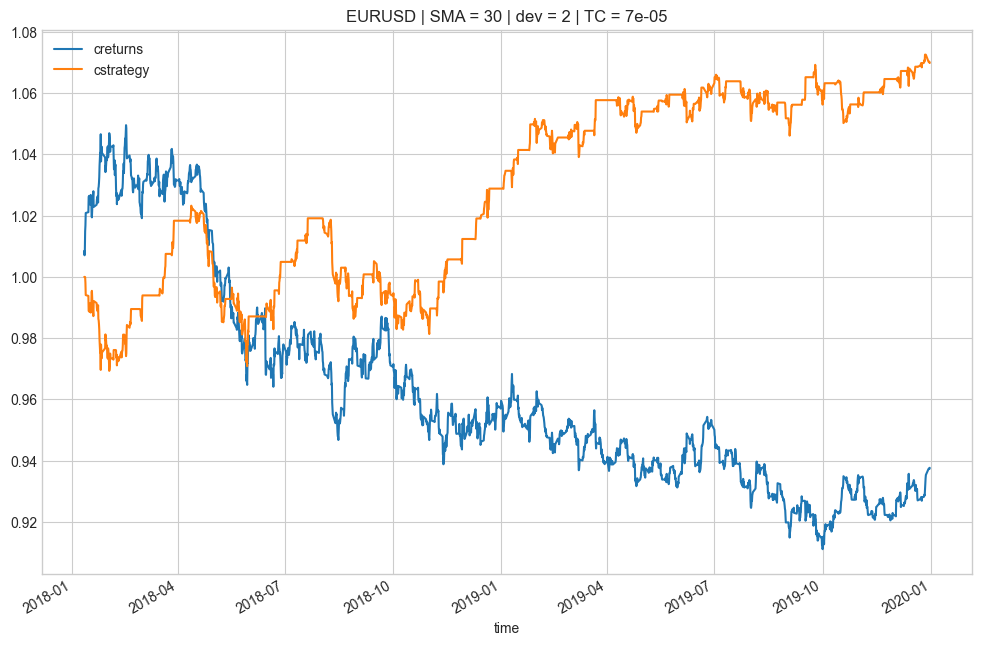

In [17]:
# ahora podemos graficar los resultados del backtest para análisis
tester.plot_results()

In [18]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

(array([58.,  1.]), np.float64(1.238111))

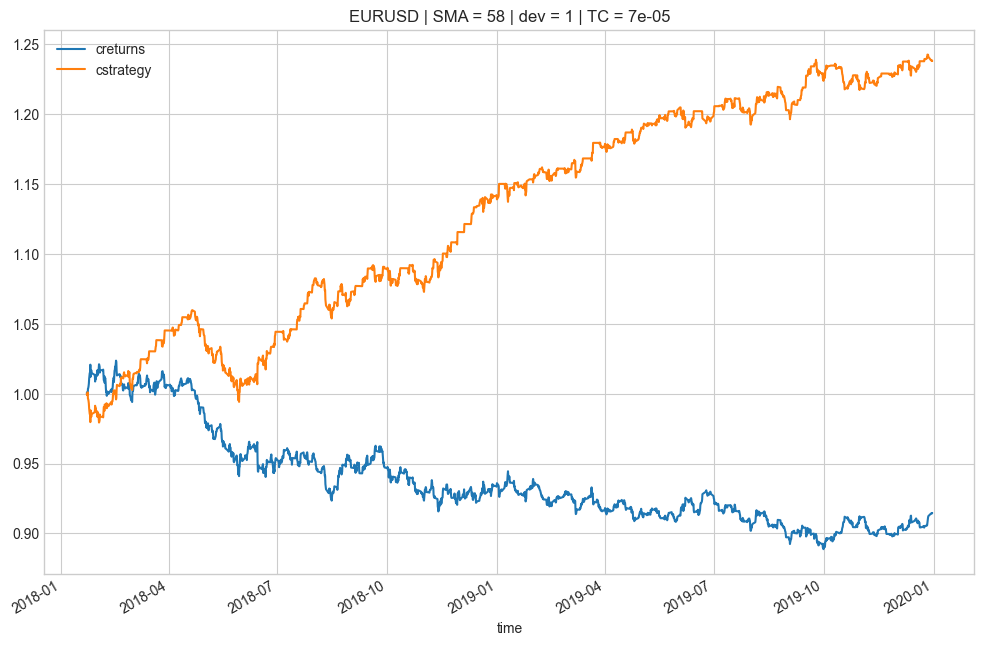

In [19]:
tester.plot_results()

<h3> Backtesting and Forward testing </h3>

Hasta ahora hemos optimizado nuestra estrategia basados en el período de tiempo que va de 2018 a 2019, peor no hay garantía que esta estrategia sea también la mejor estrategia en un futuro próximo.  
Lo que deberíamos hacer es separar nuestro análisis en dos partes, un período de entrenamiento en el cual se optimiza la estrategia y un período de prueba en el cual se hace el backtest de la estrategia.  
Entonces el período de 2 años de datos seleccionados, lo separamos en dos períodos de tiempo. El primero (el año 2018) será el período de entrenamiento, empezando con la estrategia con ventana de 30 y desviación de 2 e incluído el costo de transacción:

In [29]:
train = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2018-12-31", ptc) # in-sample

In [27]:
train.optimize_parameters((25, 100, 1), (1, 5, 1)) #in-sample

(array([74.,  1.]), np.float64(1.151185))

Arriba se puede ver el resultado de la optimización obteniéndose la estrategia de 74 para la ventana y 1 para la desviación. También el rendimiento absoluto de la estrategia optimizada es de 1.15.  

También podemos realizar una gráfica:

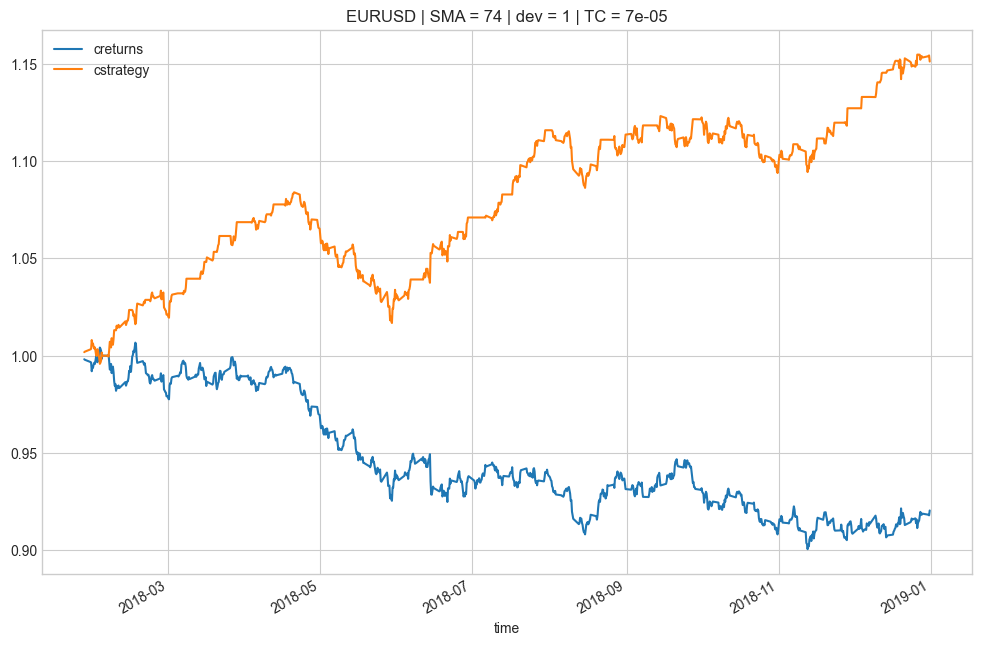

In [28]:
train.plot_results()

Arriba se muestra la gráfica de la estrategia optimizada con los datos de entrenamiento la cual no se ve tan mal, es decir se puede observar un "outperformance" de la estrategia Mean-Reversion comparada con B/H (azul).  

Ahora debemos probar la estrategia óptima con datos nuevos, por ejemplo podemos escoger los datos del año 2019:

In [30]:
tester = MeanRev.MeanRevBacktester("EURUSD", 74, 1, "2019-01-01", "2019-12-31", ptc) # out-sample

In [32]:
tester.test_strategy()

(np.float64(1.040341), np.float64(0.058301))

En la celda de arriba se observan unos valores de 1.04 (rendimiento absoluto) y un rendimiento superior de alrededor del 6%.

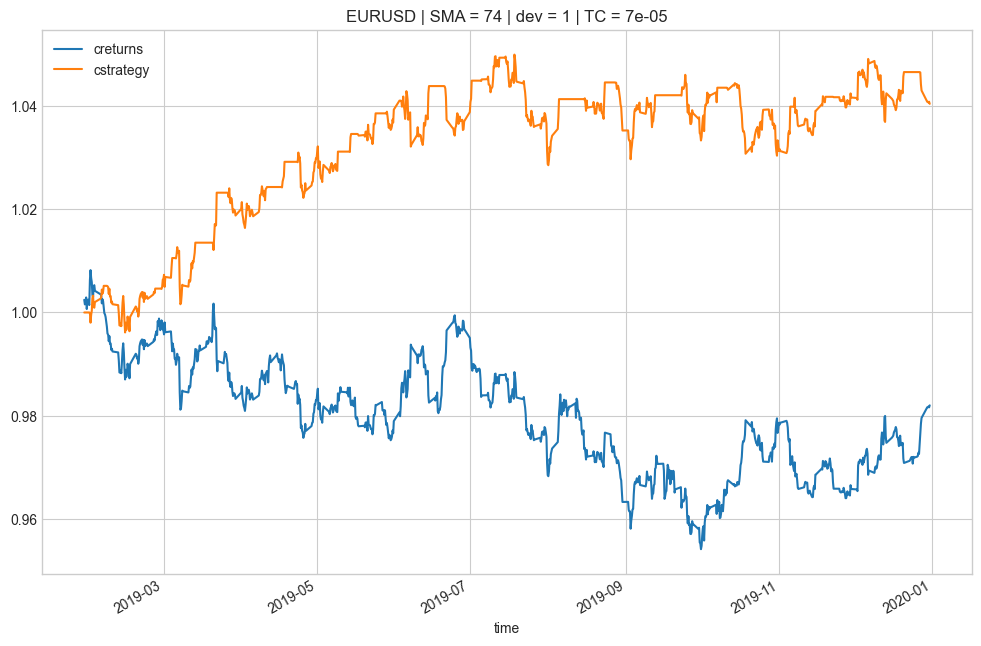

In [33]:
tester.plot_results()

En la gráfica anterior se puede observar que la estrategia Mean-Reversion tiene un rendimiento superior a B/H con los datos de prueba (out-sample). Sin embargo, la brecha entre ambas estrategias es menor que la encontrada con los datos de entrenamiento.  

Entonces, debemos tener mucho cuidado y no generalizar los resultados de una estrategia obtenida con datos pasados y aplicarla a datos futuros.